# Diamond Price Prediction

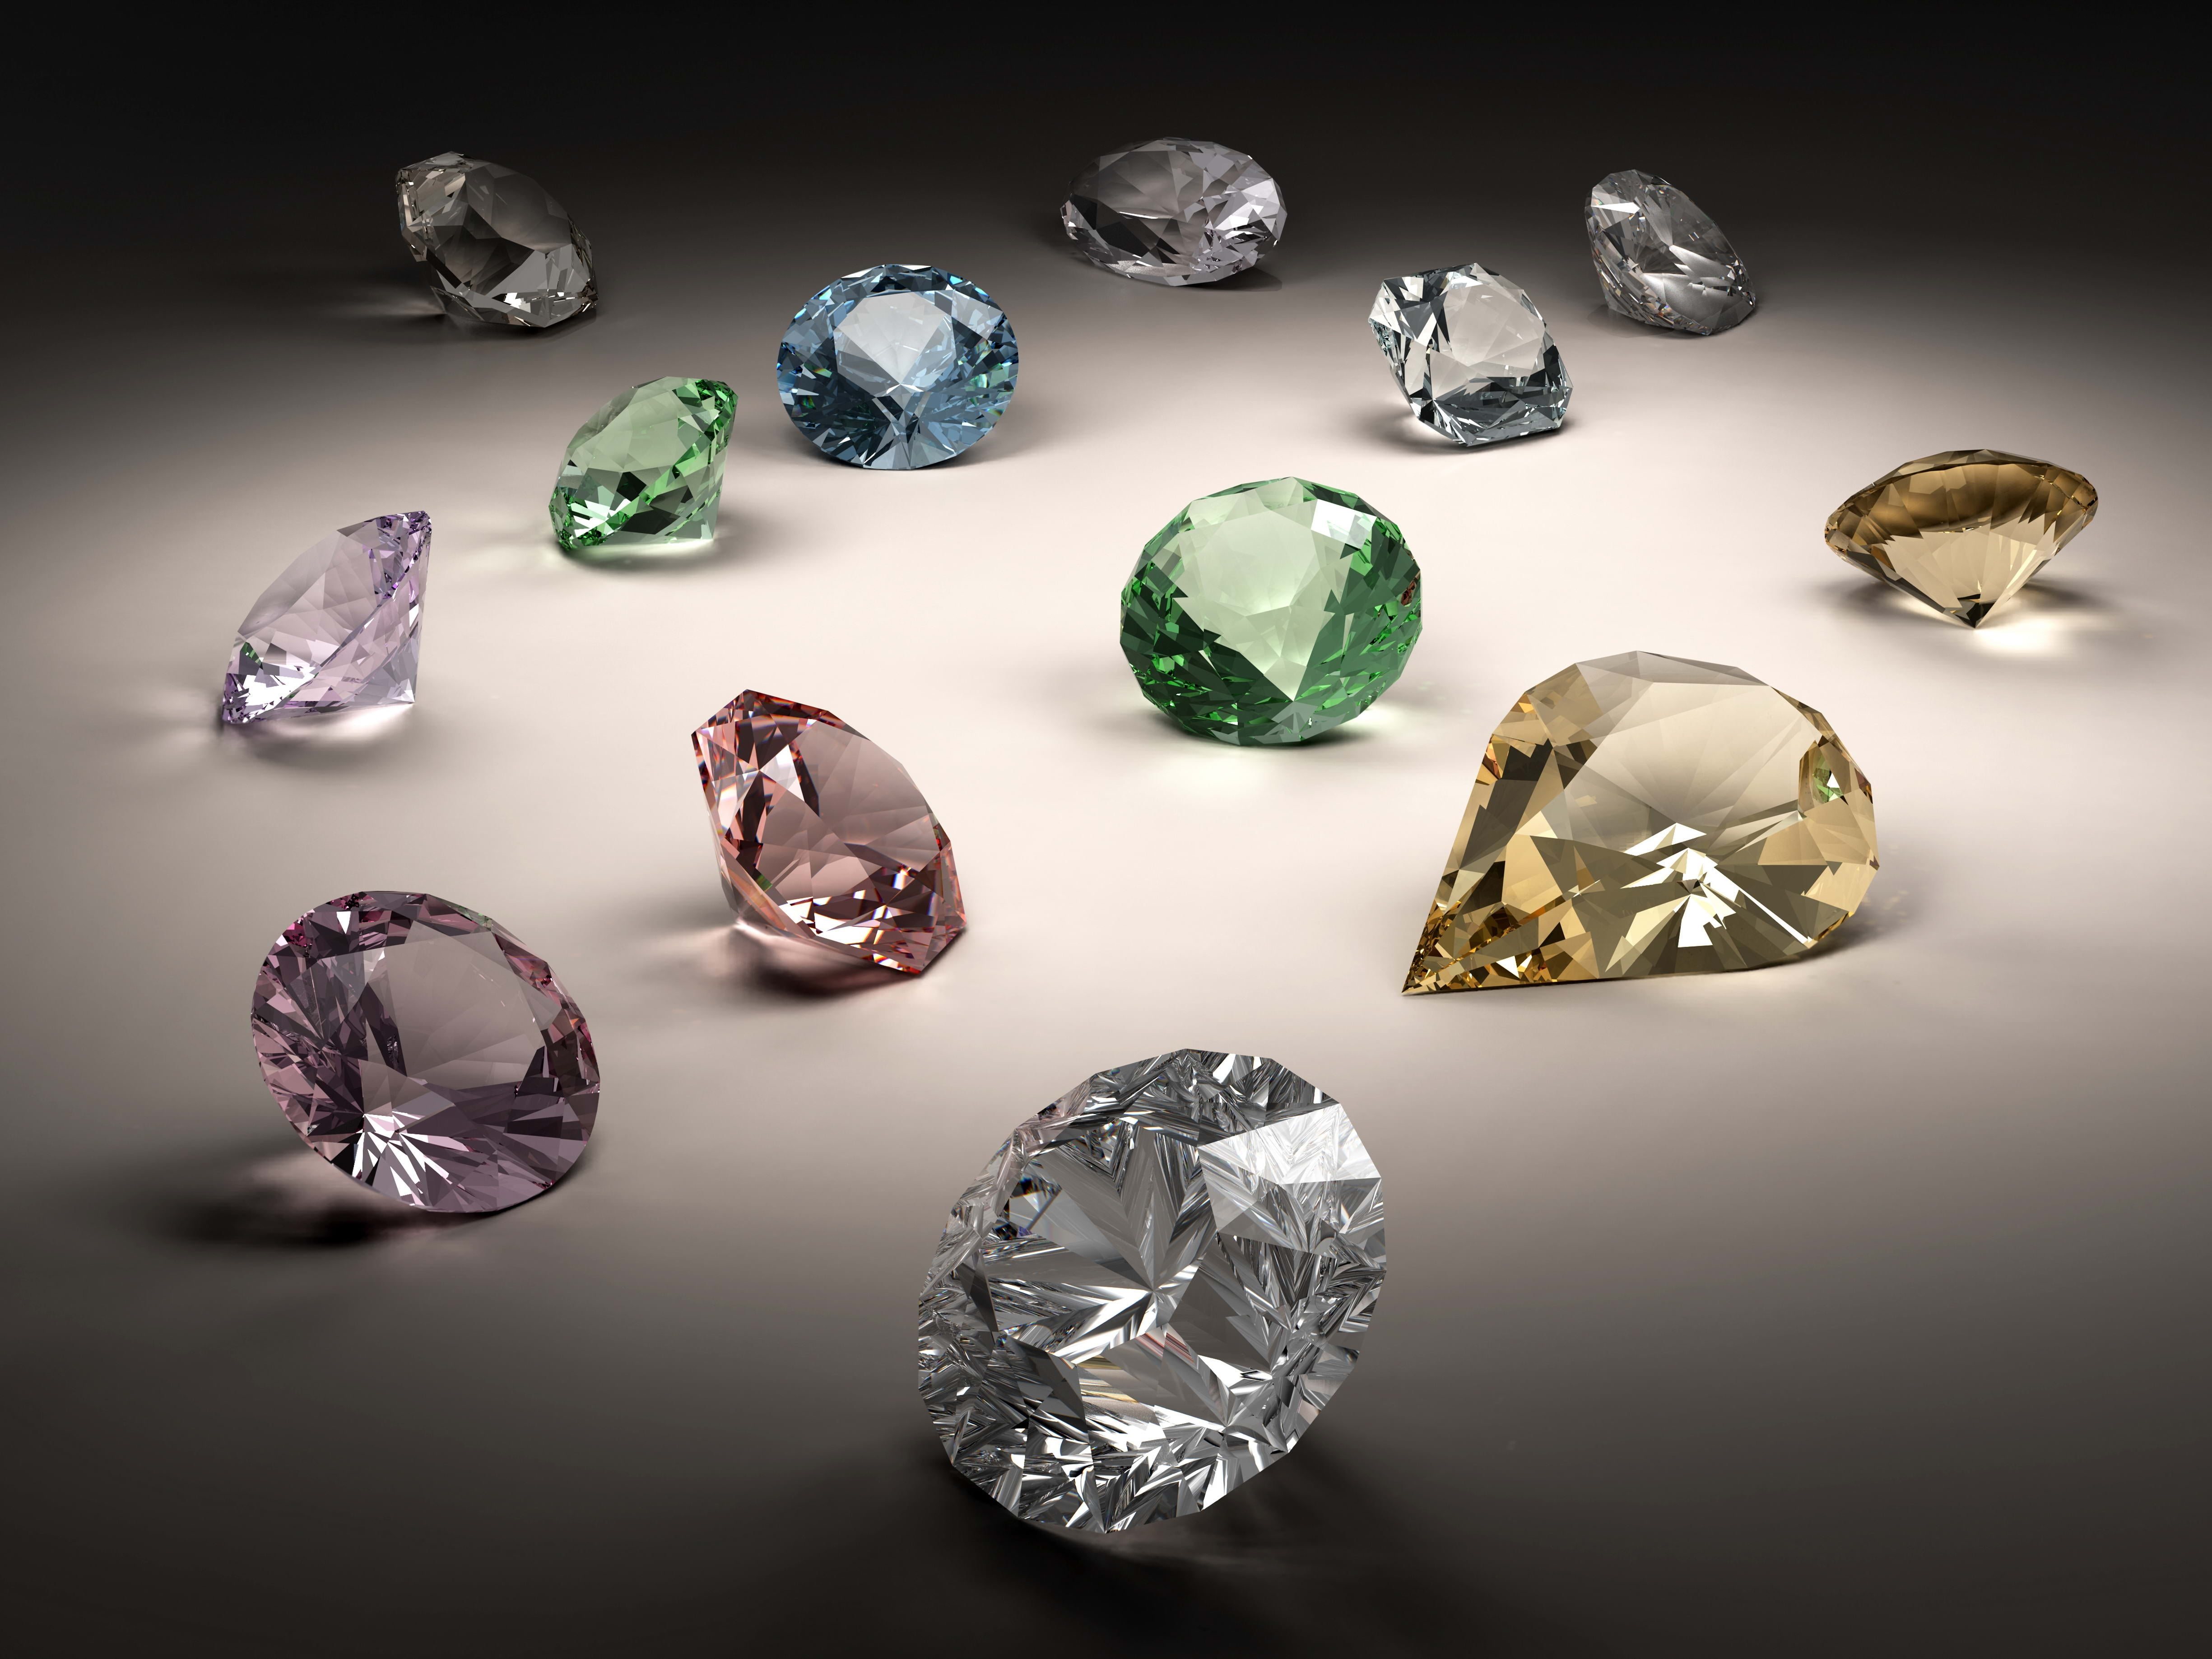

# About Features

price price in US dollars ( 326−−
 18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Introduction to Data

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
#train_data.head()
test_data.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [4]:
train_data.rename(columns={'x': 'length', 'y': 'width', 'depth': 'depth_percentage', 'z':'depth','table':'table_width'}, inplace=True)
test_data.rename(columns={'x': 'length', 'y': 'width', 'depth': 'depth_percentage', 'z':'depth','table':'table_width'}, inplace=True)
train_data.head()

,Id,carat,cut,color,clarity,depth_percentage,table_width,price,length,width,depth
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [5]:
train_data = train_data.drop('Id',axis = 1)
train_data.head()

,carat,cut,color,clarity,depth_percentage,table_width,price,length,width,depth
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [6]:
train_data.shape

(43152, 10)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carat             43152 non-null  float64
 1   cut               43152 non-null  object 
 2   color             43152 non-null  object 
 3   clarity           43152 non-null  object 
 4   depth_percentage  43152 non-null  float64
 5   table_width       43152 non-null  float64
 6   price             43152 non-null  int64  
 7   length            43152 non-null  float64
 8   width             43152 non-null  float64
 9   depth             43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [8]:
train_data.describe()

,carat,depth_percentage,table_width,price,length,width,depth
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
train_data.isnull().sum()

carat               0
cut                 0
color               0
clarity             0
depth_percentage    0
table_width         0
price               0
length              0
width               0
depth               0
dtype: int64

In [10]:
train_data.isna().sum()

carat               0
cut                 0
color               0
clarity             0
depth_percentage    0
table_width         0
price               0
length              0
width               0
depth               0
dtype: int64

In [11]:
train_data.duplicated().sum()

97

# Exploratory Data 

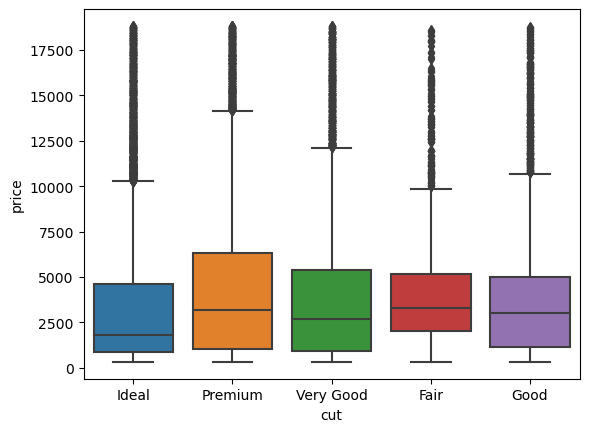

In [12]:
sns.boxplot(x='cut', y='price', data = train_data)
plt.show()

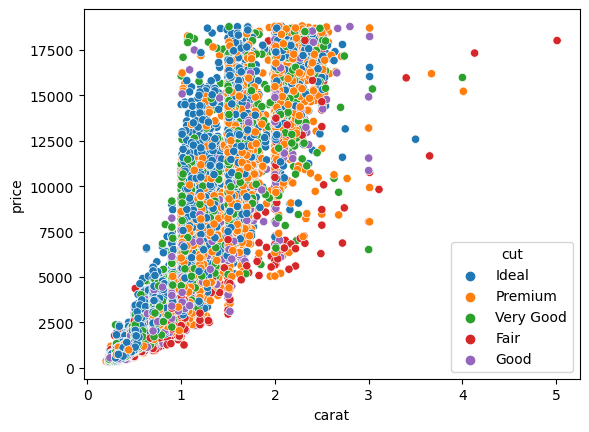

In [13]:
sns.scatterplot( x="carat", y="price", hue="cut", data=train_data)

plt.show()

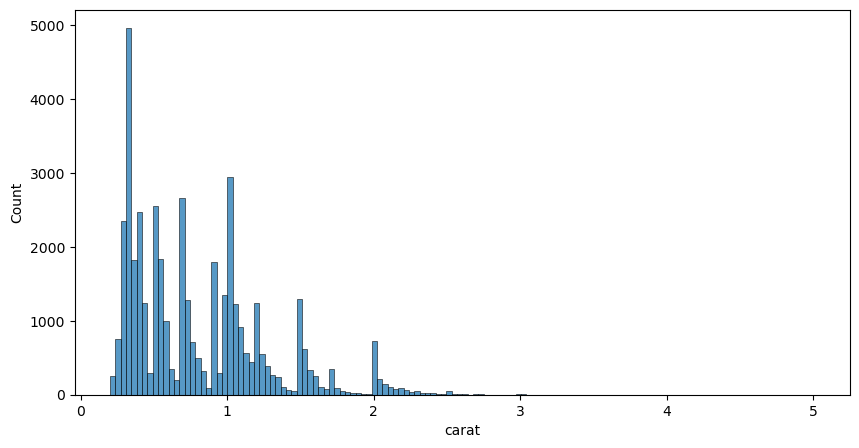

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot( x="carat", data=train_data)
plt.show()

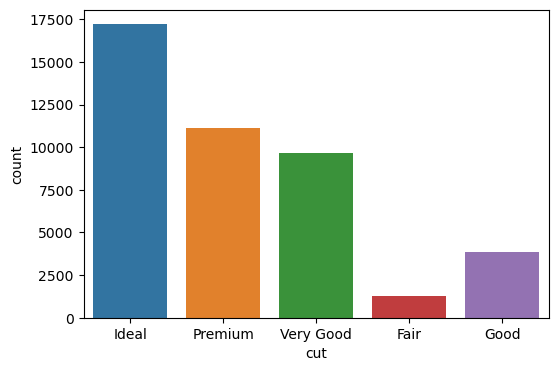

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='cut', data = train_data)

plt.show()

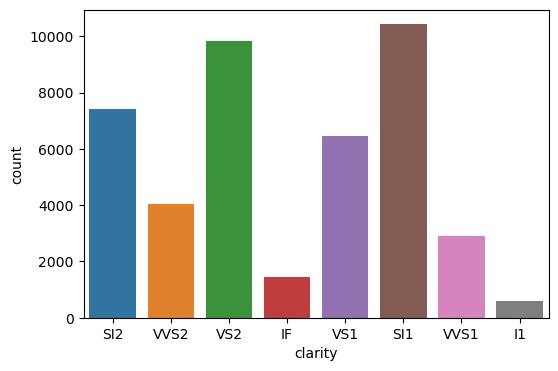

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='clarity', data = train_data)
plt.show()

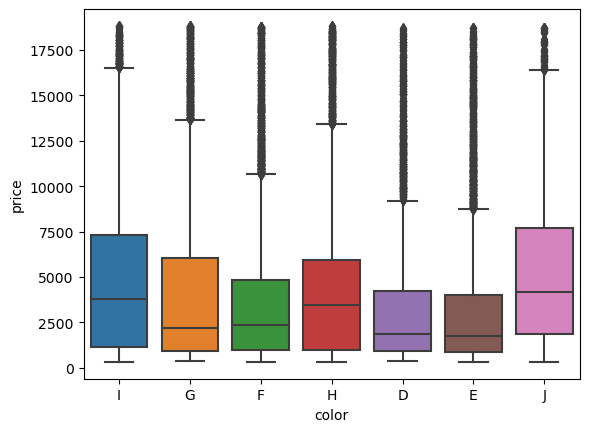

In [17]:
sns.boxplot(x='color', y='price', data = train_data)
plt.show()

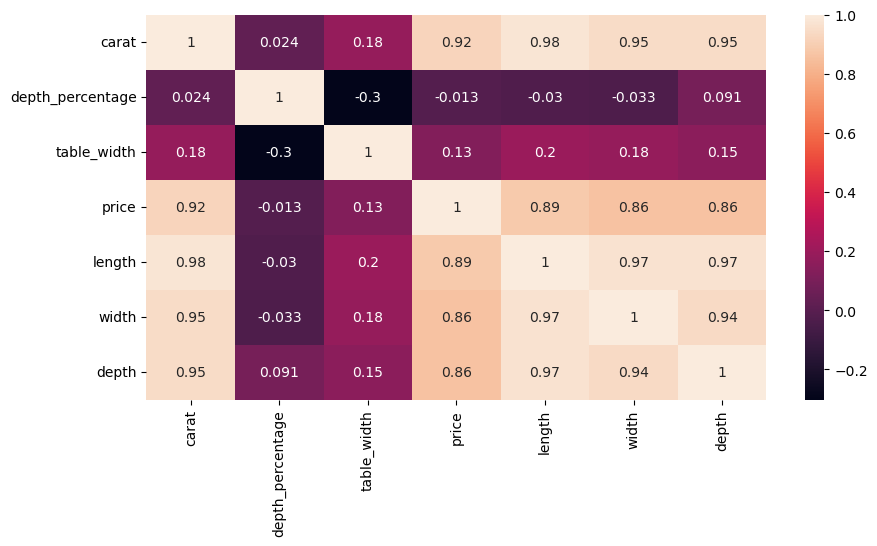

In [18]:
plt.figure(figsize=(10,5))
corr_=sns.heatmap(train_data.corr(numeric_only=True), annot = True)

# Almost depth_percentage and table_width not affect to price so let drop it

In [19]:
#columns_to_remove = ['table_width', 'depth_percentage']
train_copy = train_data.copy()
#train_copy = train_data.drop(columns_to_remove , axis = 1)
#columns_to_remove_from_test = ['Id','table_width', 'depth_percentage']
test_copy = test_data.copy()
#test_copy = test_data.drop(columns_to_remove_from_test , axis = 1)
train_copy.head()


,carat,cut,color,clarity,depth_percentage,table_width,price,length,width,depth
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


# And we will get another feature will call it volume

In [20]:
train_copy['volume'] = train_copy['length']*train_copy['width']*train_copy['depth']
train_copy['density'] = train_copy['carat'] / train_copy['volume']
train_copy['table_area'] = train_copy['width'] * train_copy['depth']
test_copy['volume'] = test_copy['length']*test_copy['width']*test_copy['depth']
test_copy['density'] = test_copy['carat'] / test_copy['volume']
test_copy['table_area'] = test_copy['width'] * test_copy['depth']
train_copy.head()

,carat,cut,color,clarity,depth_percentage,table_width,price,length,width,depth,volume,density,table_area
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,176.483340,0.006006,26.8620
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,246.965796,0.006114,33.4642
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,52.943373,0.006044,11.9511
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,86.422842,0.006133,16.6518
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,115.315200,0.006070,20.0200


In [21]:
test_data

,Id,carat,cut,color,clarity,depth_percentage,table_width,length,width,depth
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92
...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26
10784,10785,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02
10785,10786,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55
10786,10787,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07


<Axes: >

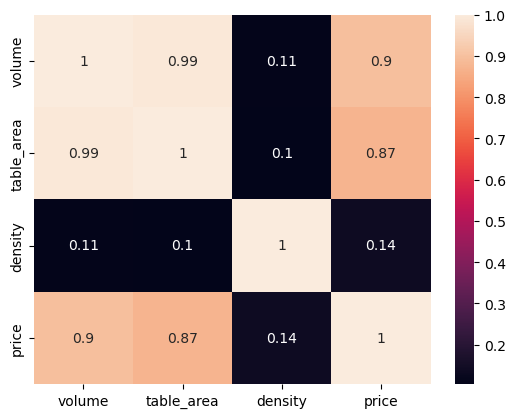

In [22]:
sns.heatmap(train_copy[['volume','table_area', 'density','price']].corr(),annot=True)

# Detect The Outliers

In [23]:
from scipy.stats import zscore

# Assuming train_data is your DataFrame containing the dataset
# Select only numerical columns for outlier detection
numerical_columns = train_copy.select_dtypes(include=['float64', 'int64'])

# Calculate IQR for each numerical column
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = (numerical_columns < lower_bound) | (numerical_columns > upper_bound)

# Count the number of outliers in each column
outliers_count = outliers.sum()

# Print the number of outliers for each column
print("Number of outliers in each column:")
print(outliers_count)

carat                  0.640000
depth_percentage       1.500000
table_width            3.000000
price               4364.250000
length                 1.830000
width                  1.820000
depth                  1.130000
volume               105.708732
density                0.000142
table_area            12.391900
dtype: float64
Number of outliers in each column:
carat               1504
depth_percentage    2056
table_width          472
price               2844
length                21
width                 19
depth                 39
volume              1041
density             1168
table_area           192
dtype: int64


In [25]:
# Function to replace outliers with np.nan using IQR
def replace_outliers_with_nan(df, features):
    for feature in features:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with np.nan
        df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound), np.nan, df[feature])
    
    return df
features = ['carat', 'depth_percentage', 'table_width', 'volume', 'density', 'table_area', 'length', 'width', 'depth']


# Replace outliers in train_copy

train_copy_cleaned = replace_outliers_with_nan(train_copy.copy(), features)

# Display the cleaned DataFrame
print(train_copy_cleaned.describe())

              carat  depth_percentage   table_width         price  \
count  41648.000000      41096.000000  42680.000000  43152.000000   
mean       0.748986         61.775241     57.376792   3929.491912   
std        0.402420          1.115775      2.077214   3985.527795   
min        0.200000         58.800000     51.600000    326.000000   
25%        0.390000         61.100000     56.000000    947.750000   
50%        0.700000         61.900000     57.000000   2401.000000   
75%        1.020000         62.500000     59.000000   5312.000000   
max        2.000000         64.700000     63.500000  18823.000000   

             length         width         depth        volume       density  \
count  43131.000000  43133.000000  43113.000000  42111.000000  41984.000000   
mean       5.730761      5.732522      3.538137    124.053863      0.006118   
std        1.117220      1.109621      0.689255     67.863606      0.000103   
min        3.730000      3.680000      1.410000      0.000000 

In [26]:
train_copy_cleaned.isnull().sum()

carat               1504
cut                    0
color                  0
clarity                0
depth_percentage    2056
table_width          472
price                  0
length                21
width                 19
depth                 39
volume              1041
density             1168
table_area           192
dtype: int64

In [27]:
train_copy_cleaned['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

# Define order for encoding , adding weights 
cut_weights = {'Ideal':5, 'Premium':4,'Very Good':3, 'Good':2, 'Fair':1}
color_weights = {'D':7,'E':6,'F':5,'G':4, 'H':3, 'I':2,'J':1}
clarity_weights = {'IF': 8,'VVS1':7,'VVS2':6, 'VS1':5, 'VS2':4 , 'SI1':3,'SI2':2,'I1':1}

train_copy_cleaned['cut'] = train_copy_cleaned['cut'].map(cut_weights)
train_copy_cleaned['color'] = train_copy_cleaned['color'].map(color_weights)
train_copy_cleaned['clarity'] = train_copy_cleaned['clarity'].map(clarity_weights)

# Apply label encoding with weights
test_copy['cut'] = test_copy['cut'].map(cut_weights)
test_copy['color'] = test_copy['color'].map(color_weights)
test_copy['clarity'] = test_copy['clarity'].map(clarity_weights)

In [29]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carat             43152 non-null  float64
 1   cut               43152 non-null  object 
 2   color             43152 non-null  object 
 3   clarity           43152 non-null  object 
 4   depth_percentage  43152 non-null  float64
 5   table_width       43152 non-null  float64
 6   price             43152 non-null  int64  
 7   length            43152 non-null  float64
 8   width             43152 non-null  float64
 9   depth             43152 non-null  float64
 10  volume            43152 non-null  float64
 11  density           43152 non-null  float64
 12  table_area        43152 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 4.3+ MB


In [30]:
train_copy.head()

,carat,cut,color,clarity,depth_percentage,table_width,price,length,width,depth,volume,density,table_area
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,176.483340,0.006006,26.8620
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,246.965796,0.006114,33.4642
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,52.943373,0.006044,11.9511
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,86.422842,0.006133,16.6518
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,115.315200,0.006070,20.0200


# Models

In [31]:
X = train_copy_cleaned.drop('price', axis = 1)
y = train_copy['price']
train_copy_cleaned

,carat,cut,color,clarity,depth_percentage,table_width,price,length,width,depth,volume,density,table_area
0,1.06,5,2,2,61.8,57.0,4270,6.57,6.60,4.07,176.483340,0.006006,26.8620
1,1.51,4,4,6,60.9,58.0,15164,7.38,7.42,4.51,246.965796,0.006114,33.4642
2,0.32,5,5,4,61.3,56.0,828,4.43,4.41,2.71,52.943373,0.006044,11.9511
3,0.53,5,4,4,61.2,56.0,1577,5.19,5.22,3.19,86.422842,0.006133,16.6518
4,0.70,4,3,6,61.0,57.0,2596,5.76,5.72,3.50,115.315200,0.006070,20.0200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43147,0.52,5,6,4,61.5,56.0,1760,5.16,5.18,3.18,84.997584,0.006118,16.4724
43148,0.72,3,7,4,62.1,59.0,3016,5.70,5.73,3.55,115.946550,0.006210,20.3415
43149,0.44,4,2,7,61.5,58.0,990,4.95,4.87,3.02,72.801630,0.006044,14.7074
43150,0.31,4,6,5,60.2,58.0,734,4.38,4.43,2.65,51.419010,0.006029,11.7395


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=40)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("Acurracy: ", r2*100)

RMSE: 558.5631939865546
Acurracy:  98.06830209046909


In [35]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb



# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=40)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Acurracy: ", r2*100)
print("RMSE:", rmse)


Acurracy:  98.13259890039603
RMSE: 549.1886018203925


In [36]:
import lightgbm as lgb

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to LightGBM dataset format
train_data = lgb.Dataset(X_train_scaled, label=y_train)
test_data = lgb.Dataset(X_test_scaled, label=y_test)

# Set parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'random_state': 42
}

# Train the model
num_round = 1000  # Number of boosting rounds
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions on the test set
y_pred = lgb_model.predict(X_test_scaled, num_iteration=lgb_model.best_iteration)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Acurracy: ", r2*100)
print("RMSE:", rmse)


Acurracy:  98.2281916964581
RMSE: 534.9473941209562


In [37]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

cat.fit(X_train,y_train)

y_pred = cat.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("Acurracy: ", r2*100)

Learning rate set to 0.07092
0:	learn: 3726.4112059	total: 200ms	remaining: 3m 19s
1:	learn: 3496.4026101	total: 209ms	remaining: 1m 44s
2:	learn: 3286.4298361	total: 218ms	remaining: 1m 12s
3:	learn: 3088.9553078	total: 226ms	remaining: 56.4s
4:	learn: 2900.4189795	total: 232ms	remaining: 46.2s
5:	learn: 2732.1101411	total: 238ms	remaining: 39.4s
6:	learn: 2572.3669543	total: 245ms	remaining: 34.7s
7:	learn: 2426.3320590	total: 249ms	remaining: 30.9s
8:	learn: 2288.9827729	total: 255ms	remaining: 28.1s
9:	learn: 2164.3340909	total: 260ms	remaining: 25.8s
10:	learn: 2047.8969694	total: 265ms	remaining: 23.8s
11:	learn: 1945.0799005	total: 269ms	remaining: 22.1s
12:	learn: 1844.1144783	total: 275ms	remaining: 20.9s
13:	learn: 1752.3458528	total: 283ms	remaining: 19.9s
14:	learn: 1669.1524521	total: 290ms	remaining: 19.1s
15:	learn: 1589.3066710	total: 298ms	remaining: 18.3s
16:	learn: 1514.2225249	total: 305ms	remaining: 17.6s
17:	learn: 1446.9956371	total: 311ms	remaining: 17s
18:	lear

184:	learn: 519.5814150	total: 998ms	remaining: 4.39s
185:	learn: 519.2187240	total: 1s	remaining: 4.38s
186:	learn: 518.8714447	total: 1s	remaining: 4.37s
187:	learn: 518.4839972	total: 1.01s	remaining: 4.36s
188:	learn: 518.0840861	total: 1.01s	remaining: 4.35s
189:	learn: 517.7464561	total: 1.02s	remaining: 4.34s
190:	learn: 517.2400049	total: 1.02s	remaining: 4.33s
191:	learn: 516.8898254	total: 1.03s	remaining: 4.32s
192:	learn: 516.5899969	total: 1.03s	remaining: 4.31s
193:	learn: 516.3211895	total: 1.03s	remaining: 4.3s
194:	learn: 515.9642347	total: 1.04s	remaining: 4.29s
195:	learn: 515.5204335	total: 1.04s	remaining: 4.28s
196:	learn: 515.1269696	total: 1.05s	remaining: 4.27s
197:	learn: 514.7584578	total: 1.05s	remaining: 4.26s
198:	learn: 514.4786234	total: 1.05s	remaining: 4.25s
199:	learn: 514.0374313	total: 1.06s	remaining: 4.24s
200:	learn: 513.6005485	total: 1.06s	remaining: 4.23s
201:	learn: 513.2092566	total: 1.07s	remaining: 4.22s
202:	learn: 512.9268583	total: 1.07

381:	learn: 467.4195674	total: 1.78s	remaining: 2.89s
382:	learn: 467.2517812	total: 1.79s	remaining: 2.88s
383:	learn: 467.0468256	total: 1.79s	remaining: 2.88s
384:	learn: 466.9203324	total: 1.8s	remaining: 2.87s
385:	learn: 466.7017705	total: 1.81s	remaining: 2.88s
386:	learn: 466.4498086	total: 1.81s	remaining: 2.88s
387:	learn: 466.2987123	total: 1.82s	remaining: 2.87s
388:	learn: 466.0741398	total: 1.82s	remaining: 2.86s
389:	learn: 465.8666386	total: 1.83s	remaining: 2.86s
390:	learn: 465.6670156	total: 1.83s	remaining: 2.85s
391:	learn: 465.4192750	total: 1.83s	remaining: 2.85s
392:	learn: 465.1781596	total: 1.84s	remaining: 2.84s
393:	learn: 464.9885862	total: 1.84s	remaining: 2.84s
394:	learn: 464.8104215	total: 1.85s	remaining: 2.83s
395:	learn: 464.5891888	total: 1.85s	remaining: 2.82s
396:	learn: 464.4312792	total: 1.85s	remaining: 2.82s
397:	learn: 464.1867223	total: 1.86s	remaining: 2.81s
398:	learn: 464.0683441	total: 1.86s	remaining: 2.81s
399:	learn: 464.0127191	total

578:	learn: 438.5404610	total: 2.59s	remaining: 1.88s
579:	learn: 438.4759530	total: 2.6s	remaining: 1.88s
580:	learn: 438.4490024	total: 2.6s	remaining: 1.87s
581:	learn: 438.3471256	total: 2.6s	remaining: 1.87s
582:	learn: 438.1664041	total: 2.61s	remaining: 1.86s
583:	learn: 438.0670420	total: 2.61s	remaining: 1.86s
584:	learn: 437.8355122	total: 2.61s	remaining: 1.85s
585:	learn: 437.6658635	total: 2.62s	remaining: 1.85s
586:	learn: 437.4708668	total: 2.62s	remaining: 1.84s
587:	learn: 437.2879573	total: 2.63s	remaining: 1.84s
588:	learn: 437.1626003	total: 2.63s	remaining: 1.83s
589:	learn: 437.0819907	total: 2.63s	remaining: 1.83s
590:	learn: 436.8285585	total: 2.64s	remaining: 1.82s
591:	learn: 436.6596303	total: 2.64s	remaining: 1.82s
592:	learn: 436.4439918	total: 2.65s	remaining: 1.81s
593:	learn: 436.3793854	total: 2.65s	remaining: 1.81s
594:	learn: 436.1313961	total: 2.65s	remaining: 1.8s
595:	learn: 435.9317723	total: 2.66s	remaining: 1.8s
596:	learn: 435.8213732	total: 2.

772:	learn: 416.7447049	total: 3.38s	remaining: 994ms
773:	learn: 416.6686619	total: 3.39s	remaining: 989ms
774:	learn: 416.5714598	total: 3.39s	remaining: 985ms
775:	learn: 416.3880343	total: 3.4s	remaining: 980ms
776:	learn: 416.3044270	total: 3.4s	remaining: 976ms
777:	learn: 416.2670188	total: 3.4s	remaining: 971ms
778:	learn: 416.1560703	total: 3.41s	remaining: 967ms
779:	learn: 416.0139021	total: 3.41s	remaining: 963ms
780:	learn: 415.9364156	total: 3.42s	remaining: 958ms
781:	learn: 415.8426125	total: 3.42s	remaining: 954ms
782:	learn: 415.6286321	total: 3.42s	remaining: 949ms
783:	learn: 415.5876912	total: 3.43s	remaining: 945ms
784:	learn: 415.5074941	total: 3.43s	remaining: 940ms
785:	learn: 415.4920105	total: 3.44s	remaining: 936ms
786:	learn: 415.3407586	total: 3.44s	remaining: 931ms
787:	learn: 415.2460372	total: 3.44s	remaining: 927ms
788:	learn: 415.0805994	total: 3.45s	remaining: 922ms
789:	learn: 414.9832147	total: 3.45s	remaining: 918ms
790:	learn: 414.8304412	total: 

966:	learn: 399.9355399	total: 4.17s	remaining: 142ms
967:	learn: 399.8972413	total: 4.18s	remaining: 138ms
968:	learn: 399.8005619	total: 4.18s	remaining: 134ms
969:	learn: 399.7055129	total: 4.2s	remaining: 130ms
970:	learn: 399.6125821	total: 4.2s	remaining: 125ms
971:	learn: 399.5022396	total: 4.2s	remaining: 121ms
972:	learn: 399.3797880	total: 4.21s	remaining: 117ms
973:	learn: 399.3192005	total: 4.21s	remaining: 112ms
974:	learn: 399.2902536	total: 4.22s	remaining: 108ms
975:	learn: 399.1507634	total: 4.22s	remaining: 104ms
976:	learn: 399.0362283	total: 4.22s	remaining: 99.5ms
977:	learn: 398.9372043	total: 4.23s	remaining: 95.1ms
978:	learn: 398.8253405	total: 4.23s	remaining: 90.8ms
979:	learn: 398.7541956	total: 4.24s	remaining: 86.5ms
980:	learn: 398.6968756	total: 4.24s	remaining: 82.1ms
981:	learn: 398.6125859	total: 4.25s	remaining: 77.8ms
982:	learn: 398.4984563	total: 4.25s	remaining: 73.5ms
983:	learn: 398.3226420	total: 4.25s	remaining: 69.2ms
984:	learn: 398.2597776

In [38]:
test_copy.drop(columns = "Id",inplace=True)

# We can use the avg of more than one algorithm

In [49]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor

catboost_reg = CatBoostRegressor()
rf_reg = RandomForestRegressor()

stacked_reg = StackingRegressor(
    estimators=[
        ('catboost', catboost_reg),
        ('random', rf_reg)
    ],
    final_estimator=catboost_reg,
    cv=5  
)
stacked_reg.fit(X_train, y_train)
y_pred = stacked_reg.predict(X_test)
print("Stacked Regressor R^2 Score:", np.sqrt(mean_squared_error(y_test,y_pred)))

Learning rate set to 0.07092
0:	learn: 3726.4112059	total: 6.29ms	remaining: 6.28s
1:	learn: 3496.4026101	total: 12.4ms	remaining: 6.18s
2:	learn: 3286.4298361	total: 17.1ms	remaining: 5.7s
3:	learn: 3088.9553078	total: 21.9ms	remaining: 5.45s
4:	learn: 2900.4189795	total: 26.4ms	remaining: 5.26s
5:	learn: 2732.1101411	total: 31.3ms	remaining: 5.19s
6:	learn: 2572.3669543	total: 35.8ms	remaining: 5.08s
7:	learn: 2426.3320590	total: 40.2ms	remaining: 4.98s
8:	learn: 2288.9827729	total: 44.5ms	remaining: 4.9s
9:	learn: 2164.3340909	total: 49.3ms	remaining: 4.88s
10:	learn: 2047.8969694	total: 54.3ms	remaining: 4.88s
11:	learn: 1945.0799005	total: 59.5ms	remaining: 4.9s
12:	learn: 1844.1144783	total: 65.3ms	remaining: 4.96s
13:	learn: 1752.3458528	total: 71.8ms	remaining: 5.06s
14:	learn: 1669.1524521	total: 78.6ms	remaining: 5.16s
15:	learn: 1589.3066710	total: 85.1ms	remaining: 5.23s
16:	learn: 1514.2225249	total: 91.7ms	remaining: 5.3s
17:	learn: 1446.9956371	total: 98.2ms	remaining: 5

175:	learn: 522.9732299	total: 797ms	remaining: 3.73s
176:	learn: 522.6893850	total: 801ms	remaining: 3.73s
177:	learn: 522.3992844	total: 807ms	remaining: 3.72s
178:	learn: 521.8701814	total: 812ms	remaining: 3.72s
179:	learn: 521.5024905	total: 817ms	remaining: 3.72s
180:	learn: 521.0579719	total: 822ms	remaining: 3.72s
181:	learn: 520.6773282	total: 827ms	remaining: 3.72s
182:	learn: 520.2428086	total: 832ms	remaining: 3.71s
183:	learn: 519.9403813	total: 836ms	remaining: 3.71s
184:	learn: 519.5814150	total: 841ms	remaining: 3.7s
185:	learn: 519.2187240	total: 845ms	remaining: 3.7s
186:	learn: 518.8714447	total: 850ms	remaining: 3.69s
187:	learn: 518.4839972	total: 854ms	remaining: 3.69s
188:	learn: 518.0840861	total: 859ms	remaining: 3.68s
189:	learn: 517.7464561	total: 863ms	remaining: 3.68s
190:	learn: 517.2400049	total: 868ms	remaining: 3.67s
191:	learn: 516.8898254	total: 872ms	remaining: 3.67s
192:	learn: 516.5899969	total: 877ms	remaining: 3.67s
193:	learn: 516.3211895	total:

346:	learn: 474.5923489	total: 1.58s	remaining: 2.98s
347:	learn: 474.3121405	total: 1.59s	remaining: 2.98s
348:	learn: 474.1449018	total: 1.59s	remaining: 2.98s
349:	learn: 473.9723123	total: 1.6s	remaining: 2.97s
350:	learn: 473.6574292	total: 1.6s	remaining: 2.97s
351:	learn: 473.2566829	total: 1.61s	remaining: 2.96s
352:	learn: 473.0683977	total: 1.61s	remaining: 2.96s
353:	learn: 472.9242041	total: 1.62s	remaining: 2.95s
354:	learn: 472.6815916	total: 1.62s	remaining: 2.95s
355:	learn: 472.5450633	total: 1.63s	remaining: 2.94s
356:	learn: 472.3413378	total: 1.63s	remaining: 2.94s
357:	learn: 471.9735876	total: 1.63s	remaining: 2.93s
358:	learn: 471.7608000	total: 1.64s	remaining: 2.92s
359:	learn: 471.5662605	total: 1.64s	remaining: 2.92s
360:	learn: 471.3614495	total: 1.65s	remaining: 2.91s
361:	learn: 471.2551075	total: 1.65s	remaining: 2.91s
362:	learn: 470.9587482	total: 1.65s	remaining: 2.9s
363:	learn: 470.6846661	total: 1.66s	remaining: 2.9s
364:	learn: 470.6081552	total: 1

538:	learn: 443.5073144	total: 2.39s	remaining: 2.04s
539:	learn: 443.4059948	total: 2.4s	remaining: 2.04s
540:	learn: 443.3397186	total: 2.4s	remaining: 2.04s
541:	learn: 443.2374893	total: 2.4s	remaining: 2.03s
542:	learn: 443.1335098	total: 2.41s	remaining: 2.03s
543:	learn: 443.0010138	total: 2.41s	remaining: 2.02s
544:	learn: 442.8661090	total: 2.42s	remaining: 2.02s
545:	learn: 442.6926637	total: 2.42s	remaining: 2.02s
546:	learn: 442.6468477	total: 2.43s	remaining: 2.01s
547:	learn: 442.6140800	total: 2.43s	remaining: 2s
548:	learn: 442.4499190	total: 2.44s	remaining: 2s
549:	learn: 442.3388145	total: 2.44s	remaining: 2s
550:	learn: 442.1307515	total: 2.44s	remaining: 1.99s
551:	learn: 441.9167594	total: 2.45s	remaining: 1.99s
552:	learn: 441.7953083	total: 2.45s	remaining: 1.98s
553:	learn: 441.6167453	total: 2.46s	remaining: 1.98s
554:	learn: 441.4557322	total: 2.46s	remaining: 1.97s
555:	learn: 441.3016692	total: 2.46s	remaining: 1.97s
556:	learn: 441.2242105	total: 2.47s	rem

724:	learn: 421.5877501	total: 3.19s	remaining: 1.21s
725:	learn: 421.4652266	total: 3.19s	remaining: 1.21s
726:	learn: 421.4301635	total: 3.2s	remaining: 1.2s
727:	learn: 421.3516329	total: 3.2s	remaining: 1.2s
728:	learn: 421.2560404	total: 3.21s	remaining: 1.19s
729:	learn: 421.1618223	total: 3.21s	remaining: 1.19s
730:	learn: 421.0786149	total: 3.22s	remaining: 1.18s
731:	learn: 420.9743089	total: 3.22s	remaining: 1.18s
732:	learn: 420.7934297	total: 3.23s	remaining: 1.17s
733:	learn: 420.6873381	total: 3.23s	remaining: 1.17s
734:	learn: 420.6055672	total: 3.23s	remaining: 1.17s
735:	learn: 420.4584609	total: 3.24s	remaining: 1.16s
736:	learn: 420.3717314	total: 3.24s	remaining: 1.16s
737:	learn: 420.2692918	total: 3.25s	remaining: 1.15s
738:	learn: 420.0967890	total: 3.25s	remaining: 1.15s
739:	learn: 419.9848429	total: 3.25s	remaining: 1.14s
740:	learn: 419.8632464	total: 3.26s	remaining: 1.14s
741:	learn: 419.8156979	total: 3.26s	remaining: 1.13s
742:	learn: 419.7091034	total: 3

919:	learn: 403.7066117	total: 4s	remaining: 348ms
920:	learn: 403.6279373	total: 4.01s	remaining: 344ms
921:	learn: 403.5249296	total: 4.01s	remaining: 340ms
922:	learn: 403.4604104	total: 4.02s	remaining: 335ms
923:	learn: 403.4268152	total: 4.02s	remaining: 331ms
924:	learn: 403.3963662	total: 4.03s	remaining: 327ms
925:	learn: 403.2807964	total: 4.03s	remaining: 322ms
926:	learn: 403.1536417	total: 4.03s	remaining: 318ms
927:	learn: 403.0551189	total: 4.04s	remaining: 313ms
928:	learn: 403.0100030	total: 4.04s	remaining: 309ms
929:	learn: 402.8775660	total: 4.05s	remaining: 305ms
930:	learn: 402.7521920	total: 4.05s	remaining: 300ms
931:	learn: 402.6650904	total: 4.05s	remaining: 296ms
932:	learn: 402.5433226	total: 4.06s	remaining: 292ms
933:	learn: 402.4972357	total: 4.06s	remaining: 287ms
934:	learn: 402.4048522	total: 4.07s	remaining: 283ms
935:	learn: 402.3514068	total: 4.07s	remaining: 278ms
936:	learn: 402.2747423	total: 4.08s	remaining: 274ms
937:	learn: 402.2400814	total: 

97:	learn: 578.7353715	total: 386ms	remaining: 3.55s
98:	learn: 577.1779811	total: 390ms	remaining: 3.55s
99:	learn: 576.1959227	total: 394ms	remaining: 3.54s
100:	learn: 575.3189774	total: 397ms	remaining: 3.54s
101:	learn: 574.0064633	total: 401ms	remaining: 3.53s
102:	learn: 572.2877476	total: 404ms	remaining: 3.52s
103:	learn: 571.4322488	total: 408ms	remaining: 3.51s
104:	learn: 570.6077499	total: 411ms	remaining: 3.5s
105:	learn: 569.8045444	total: 414ms	remaining: 3.49s
106:	learn: 569.1848496	total: 418ms	remaining: 3.49s
107:	learn: 568.3671532	total: 421ms	remaining: 3.48s
108:	learn: 567.3536234	total: 425ms	remaining: 3.47s
109:	learn: 566.8441722	total: 428ms	remaining: 3.46s
110:	learn: 565.9685208	total: 431ms	remaining: 3.45s
111:	learn: 564.6664429	total: 435ms	remaining: 3.45s
112:	learn: 563.9888612	total: 438ms	remaining: 3.44s
113:	learn: 563.0700178	total: 442ms	remaining: 3.43s
114:	learn: 562.4833471	total: 445ms	remaining: 3.42s
115:	learn: 561.9681501	total: 4

268:	learn: 495.9947329	total: 993ms	remaining: 2.7s
269:	learn: 495.5604715	total: 997ms	remaining: 2.69s
270:	learn: 495.3487610	total: 1s	remaining: 2.69s
271:	learn: 495.0415879	total: 1.01s	remaining: 2.71s
272:	learn: 494.7888754	total: 1.02s	remaining: 2.71s
273:	learn: 494.5700974	total: 1.02s	remaining: 2.7s
274:	learn: 494.3372663	total: 1.02s	remaining: 2.7s
275:	learn: 494.0786568	total: 1.03s	remaining: 2.7s
276:	learn: 493.7722476	total: 1.03s	remaining: 2.7s
277:	learn: 493.5181197	total: 1.04s	remaining: 2.69s
278:	learn: 493.2890537	total: 1.04s	remaining: 2.69s
279:	learn: 493.1027496	total: 1.04s	remaining: 2.69s
280:	learn: 492.7835543	total: 1.05s	remaining: 2.68s
281:	learn: 492.5794378	total: 1.05s	remaining: 2.68s
282:	learn: 492.3387603	total: 1.06s	remaining: 2.68s
283:	learn: 492.0441205	total: 1.06s	remaining: 2.67s
284:	learn: 491.8010776	total: 1.06s	remaining: 2.67s
285:	learn: 491.4941558	total: 1.07s	remaining: 2.67s
286:	learn: 491.1822708	total: 1.07s

474:	learn: 451.3076086	total: 1.77s	remaining: 1.96s
475:	learn: 451.1890834	total: 1.77s	remaining: 1.96s
476:	learn: 450.9387131	total: 1.78s	remaining: 1.95s
477:	learn: 450.8475033	total: 1.78s	remaining: 1.95s
478:	learn: 450.5468535	total: 1.79s	remaining: 1.94s
479:	learn: 450.3488444	total: 1.79s	remaining: 1.94s
480:	learn: 450.2130124	total: 1.79s	remaining: 1.94s
481:	learn: 450.1076516	total: 1.8s	remaining: 1.93s
482:	learn: 450.0255650	total: 1.8s	remaining: 1.93s
483:	learn: 449.8235602	total: 1.81s	remaining: 1.93s
484:	learn: 449.6429042	total: 1.81s	remaining: 1.92s
485:	learn: 449.4567293	total: 1.81s	remaining: 1.92s
486:	learn: 449.3833184	total: 1.82s	remaining: 1.91s
487:	learn: 449.3121011	total: 1.82s	remaining: 1.91s
488:	learn: 449.1693734	total: 1.82s	remaining: 1.91s
489:	learn: 448.9609469	total: 1.83s	remaining: 1.9s
490:	learn: 448.8452411	total: 1.83s	remaining: 1.9s
491:	learn: 448.7126941	total: 1.83s	remaining: 1.89s
492:	learn: 448.4835054	total: 1

635:	learn: 428.4480298	total: 2.36s	remaining: 1.35s
636:	learn: 428.2108430	total: 2.37s	remaining: 1.35s
637:	learn: 428.0945698	total: 2.37s	remaining: 1.34s
638:	learn: 427.9091296	total: 2.38s	remaining: 1.34s
639:	learn: 427.8008080	total: 2.38s	remaining: 1.34s
640:	learn: 427.6194513	total: 2.38s	remaining: 1.33s
641:	learn: 427.5282880	total: 2.39s	remaining: 1.33s
642:	learn: 427.3931327	total: 2.39s	remaining: 1.33s
643:	learn: 427.2772473	total: 2.39s	remaining: 1.32s
644:	learn: 427.1406119	total: 2.4s	remaining: 1.32s
645:	learn: 426.9774486	total: 2.4s	remaining: 1.31s
646:	learn: 426.9485200	total: 2.4s	remaining: 1.31s
647:	learn: 426.8243891	total: 2.41s	remaining: 1.31s
648:	learn: 426.6245307	total: 2.41s	remaining: 1.3s
649:	learn: 426.6041589	total: 2.42s	remaining: 1.3s
650:	learn: 426.5517320	total: 2.42s	remaining: 1.3s
651:	learn: 426.3723658	total: 2.42s	remaining: 1.29s
652:	learn: 426.1690223	total: 2.42s	remaining: 1.29s
653:	learn: 426.0030383	total: 2.4

793:	learn: 410.5322110	total: 2.96s	remaining: 768ms
794:	learn: 410.4334409	total: 2.96s	remaining: 764ms
795:	learn: 410.3348101	total: 2.97s	remaining: 760ms
796:	learn: 410.3050447	total: 2.97s	remaining: 757ms
797:	learn: 410.1794824	total: 2.97s	remaining: 753ms
798:	learn: 410.1000927	total: 2.98s	remaining: 749ms
799:	learn: 410.0187508	total: 2.98s	remaining: 746ms
800:	learn: 409.9345512	total: 2.99s	remaining: 742ms
801:	learn: 409.8519776	total: 2.99s	remaining: 738ms
802:	learn: 409.7679415	total: 2.99s	remaining: 735ms
803:	learn: 409.6781314	total: 3s	remaining: 731ms
804:	learn: 409.5951578	total: 3s	remaining: 727ms
805:	learn: 409.4655502	total: 3s	remaining: 723ms
806:	learn: 409.2984921	total: 3.01s	remaining: 720ms
807:	learn: 409.1364304	total: 3.01s	remaining: 716ms
808:	learn: 409.0580757	total: 3.02s	remaining: 712ms
809:	learn: 408.9864453	total: 3.02s	remaining: 709ms
810:	learn: 408.8450023	total: 3.02s	remaining: 705ms
811:	learn: 408.7403708	total: 3.03s	

995:	learn: 391.7780129	total: 3.74s	remaining: 15ms
996:	learn: 391.6981702	total: 3.75s	remaining: 11.3ms
997:	learn: 391.6150036	total: 3.75s	remaining: 7.52ms
998:	learn: 391.5618552	total: 3.75s	remaining: 3.76ms
999:	learn: 391.4374831	total: 3.76s	remaining: 0us
Learning rate set to 0.068463
0:	learn: 3737.0037595	total: 6.81ms	remaining: 6.8s
1:	learn: 3514.2037471	total: 13.2ms	remaining: 6.58s
2:	learn: 3309.8796363	total: 19.2ms	remaining: 6.4s
3:	learn: 3116.2474641	total: 24.5ms	remaining: 6.09s
4:	learn: 2932.7064651	total: 28.3ms	remaining: 5.63s
5:	learn: 2763.3822905	total: 32.7ms	remaining: 5.41s
6:	learn: 2606.6427537	total: 37.9ms	remaining: 5.37s
7:	learn: 2462.5382129	total: 41.7ms	remaining: 5.17s
8:	learn: 2329.8953540	total: 45.6ms	remaining: 5.02s
9:	learn: 2206.3022086	total: 51.6ms	remaining: 5.11s
10:	learn: 2093.3821483	total: 55.8ms	remaining: 5.02s
11:	learn: 1991.5910743	total: 59.5ms	remaining: 4.9s
12:	learn: 1889.9706325	total: 63.4ms	remaining: 4.81

174:	learn: 525.6726892	total: 651ms	remaining: 3.07s
175:	learn: 525.1848874	total: 655ms	remaining: 3.07s
176:	learn: 524.8772588	total: 659ms	remaining: 3.06s
177:	learn: 524.5114063	total: 663ms	remaining: 3.06s
178:	learn: 524.1621259	total: 667ms	remaining: 3.06s
179:	learn: 523.8041187	total: 671ms	remaining: 3.06s
180:	learn: 523.1962493	total: 674ms	remaining: 3.05s
181:	learn: 522.5893152	total: 678ms	remaining: 3.04s
182:	learn: 522.2159741	total: 681ms	remaining: 3.04s
183:	learn: 521.6561013	total: 685ms	remaining: 3.04s
184:	learn: 521.3792580	total: 688ms	remaining: 3.03s
185:	learn: 521.0032852	total: 692ms	remaining: 3.03s
186:	learn: 520.6445670	total: 696ms	remaining: 3.02s
187:	learn: 520.0542307	total: 700ms	remaining: 3.02s
188:	learn: 519.6144786	total: 704ms	remaining: 3.02s
189:	learn: 519.3398667	total: 707ms	remaining: 3.01s
190:	learn: 518.9775986	total: 711ms	remaining: 3.01s
191:	learn: 518.4561949	total: 715ms	remaining: 3.01s
192:	learn: 518.0600438	tota

380:	learn: 464.1132500	total: 1.44s	remaining: 2.33s
381:	learn: 463.9526604	total: 1.44s	remaining: 2.33s
382:	learn: 463.7522700	total: 1.44s	remaining: 2.33s
383:	learn: 463.5260604	total: 1.45s	remaining: 2.32s
384:	learn: 463.3797408	total: 1.45s	remaining: 2.32s
385:	learn: 463.2476273	total: 1.46s	remaining: 2.31s
386:	learn: 462.9916259	total: 1.46s	remaining: 2.31s
387:	learn: 462.8081845	total: 1.46s	remaining: 2.31s
388:	learn: 462.5084639	total: 1.47s	remaining: 2.3s
389:	learn: 462.4071087	total: 1.47s	remaining: 2.3s
390:	learn: 462.2238325	total: 1.47s	remaining: 2.29s
391:	learn: 462.0021723	total: 1.48s	remaining: 2.29s
392:	learn: 461.7830006	total: 1.48s	remaining: 2.29s
393:	learn: 461.4393681	total: 1.49s	remaining: 2.28s
394:	learn: 461.0270823	total: 1.49s	remaining: 2.28s
395:	learn: 460.8716559	total: 1.49s	remaining: 2.28s
396:	learn: 460.7112707	total: 1.5s	remaining: 2.27s
397:	learn: 460.5102994	total: 1.5s	remaining: 2.27s
398:	learn: 460.1872657	total: 1

586:	learn: 430.4303177	total: 2.21s	remaining: 1.56s
587:	learn: 430.2868452	total: 2.22s	remaining: 1.55s
588:	learn: 430.2406597	total: 2.22s	remaining: 1.55s
589:	learn: 430.1501367	total: 2.22s	remaining: 1.54s
590:	learn: 430.0667679	total: 2.23s	remaining: 1.54s
591:	learn: 429.9435257	total: 2.23s	remaining: 1.54s
592:	learn: 429.8211015	total: 2.23s	remaining: 1.53s
593:	learn: 429.6976370	total: 2.24s	remaining: 1.53s
594:	learn: 429.6236292	total: 2.24s	remaining: 1.52s
595:	learn: 429.5305782	total: 2.25s	remaining: 1.52s
596:	learn: 429.3838964	total: 2.25s	remaining: 1.52s
597:	learn: 429.3088172	total: 2.25s	remaining: 1.51s
598:	learn: 429.1600648	total: 2.25s	remaining: 1.51s
599:	learn: 429.1164173	total: 2.26s	remaining: 1.51s
600:	learn: 428.9028778	total: 2.26s	remaining: 1.5s
601:	learn: 428.7274679	total: 2.27s	remaining: 1.5s
602:	learn: 428.5846561	total: 2.27s	remaining: 1.49s
603:	learn: 428.4313776	total: 2.27s	remaining: 1.49s
604:	learn: 428.3602881	total:

752:	learn: 410.9983149	total: 2.82s	remaining: 926ms
753:	learn: 410.8289416	total: 2.83s	remaining: 922ms
754:	learn: 410.6505897	total: 2.83s	remaining: 918ms
755:	learn: 410.4922980	total: 2.83s	remaining: 915ms
756:	learn: 410.3768224	total: 2.84s	remaining: 911ms
757:	learn: 410.3257913	total: 2.84s	remaining: 907ms
758:	learn: 410.2069815	total: 2.85s	remaining: 903ms
759:	learn: 410.0514577	total: 2.85s	remaining: 900ms
760:	learn: 409.9222132	total: 2.85s	remaining: 896ms
761:	learn: 409.8258141	total: 2.86s	remaining: 892ms
762:	learn: 409.7877134	total: 2.86s	remaining: 889ms
763:	learn: 409.7014286	total: 2.86s	remaining: 885ms
764:	learn: 409.6197325	total: 2.87s	remaining: 881ms
765:	learn: 409.5613337	total: 2.87s	remaining: 877ms
766:	learn: 409.3937107	total: 2.88s	remaining: 874ms
767:	learn: 409.3671237	total: 2.88s	remaining: 870ms
768:	learn: 409.2192969	total: 2.88s	remaining: 866ms
769:	learn: 409.1267115	total: 2.89s	remaining: 862ms
770:	learn: 409.0749080	tota

915:	learn: 395.2506067	total: 3.42s	remaining: 314ms
916:	learn: 395.1562679	total: 3.43s	remaining: 310ms
917:	learn: 395.1342569	total: 3.43s	remaining: 306ms
918:	learn: 395.0911406	total: 3.44s	remaining: 303ms
919:	learn: 394.9648594	total: 3.44s	remaining: 299ms
920:	learn: 394.9157062	total: 3.44s	remaining: 295ms
921:	learn: 394.8243186	total: 3.45s	remaining: 292ms
922:	learn: 394.6629970	total: 3.45s	remaining: 288ms
923:	learn: 394.6147723	total: 3.45s	remaining: 284ms
924:	learn: 394.5357245	total: 3.46s	remaining: 280ms
925:	learn: 394.4834243	total: 3.46s	remaining: 277ms
926:	learn: 394.3533221	total: 3.46s	remaining: 273ms
927:	learn: 394.2788020	total: 3.47s	remaining: 269ms
928:	learn: 394.2434902	total: 3.47s	remaining: 265ms
929:	learn: 394.2130376	total: 3.47s	remaining: 262ms
930:	learn: 394.1045631	total: 3.48s	remaining: 258ms
931:	learn: 394.0244882	total: 3.48s	remaining: 254ms
932:	learn: 393.9732764	total: 3.48s	remaining: 250ms
933:	learn: 393.8377959	tota

97:	learn: 574.6865498	total: 402ms	remaining: 3.7s
98:	learn: 573.6691449	total: 407ms	remaining: 3.7s
99:	learn: 572.8312755	total: 411ms	remaining: 3.7s
100:	learn: 571.7940738	total: 415ms	remaining: 3.69s
101:	learn: 570.9044256	total: 419ms	remaining: 3.69s
102:	learn: 569.4088923	total: 423ms	remaining: 3.68s
103:	learn: 568.5558190	total: 427ms	remaining: 3.68s
104:	learn: 567.4951274	total: 432ms	remaining: 3.68s
105:	learn: 566.4191038	total: 436ms	remaining: 3.67s
106:	learn: 565.6007404	total: 439ms	remaining: 3.67s
107:	learn: 564.7845104	total: 443ms	remaining: 3.66s
108:	learn: 563.5488373	total: 446ms	remaining: 3.65s
109:	learn: 562.8289332	total: 450ms	remaining: 3.64s
110:	learn: 562.1208037	total: 454ms	remaining: 3.63s
111:	learn: 561.4279488	total: 457ms	remaining: 3.62s
112:	learn: 560.1249315	total: 461ms	remaining: 3.62s
113:	learn: 558.9318559	total: 464ms	remaining: 3.61s
114:	learn: 558.2412713	total: 468ms	remaining: 3.6s
115:	learn: 557.4983275	total: 471m

251:	learn: 494.8100480	total: 985ms	remaining: 2.92s
252:	learn: 494.5249878	total: 989ms	remaining: 2.92s
253:	learn: 494.1505776	total: 993ms	remaining: 2.92s
254:	learn: 493.8268800	total: 997ms	remaining: 2.91s
255:	learn: 493.5860518	total: 1s	remaining: 2.91s
256:	learn: 493.3809906	total: 1s	remaining: 2.9s
257:	learn: 493.0195677	total: 1.01s	remaining: 2.9s
258:	learn: 492.7896156	total: 1.01s	remaining: 2.9s
259:	learn: 492.4393451	total: 1.02s	remaining: 2.89s
260:	learn: 492.1182178	total: 1.02s	remaining: 2.89s
261:	learn: 491.8952639	total: 1.02s	remaining: 2.88s
262:	learn: 491.5771835	total: 1.03s	remaining: 2.88s
263:	learn: 491.2628833	total: 1.03s	remaining: 2.87s
264:	learn: 490.9317811	total: 1.03s	remaining: 2.87s
265:	learn: 490.5161940	total: 1.04s	remaining: 2.86s
266:	learn: 490.2692867	total: 1.04s	remaining: 2.86s
267:	learn: 490.0062928	total: 1.04s	remaining: 2.85s
268:	learn: 489.7432836	total: 1.05s	remaining: 2.85s
269:	learn: 489.3733472	total: 1.05s	

409:	learn: 456.1294665	total: 1.57s	remaining: 2.26s
410:	learn: 455.9468344	total: 1.58s	remaining: 2.26s
411:	learn: 455.8341821	total: 1.58s	remaining: 2.25s
412:	learn: 455.6068203	total: 1.58s	remaining: 2.25s
413:	learn: 455.4699883	total: 1.59s	remaining: 2.25s
414:	learn: 455.3353777	total: 1.59s	remaining: 2.24s
415:	learn: 455.0324815	total: 1.6s	remaining: 2.24s
416:	learn: 454.8329367	total: 1.6s	remaining: 2.24s
417:	learn: 454.6691749	total: 1.6s	remaining: 2.23s
418:	learn: 454.4741553	total: 1.61s	remaining: 2.23s
419:	learn: 454.2638744	total: 1.61s	remaining: 2.23s
420:	learn: 454.1543736	total: 1.61s	remaining: 2.22s
421:	learn: 453.9357093	total: 1.62s	remaining: 2.22s
422:	learn: 453.7187444	total: 1.62s	remaining: 2.21s
423:	learn: 453.5702621	total: 1.63s	remaining: 2.21s
424:	learn: 453.3251670	total: 1.63s	remaining: 2.2s
425:	learn: 453.2161375	total: 1.63s	remaining: 2.2s
426:	learn: 452.9134424	total: 1.64s	remaining: 2.2s
427:	learn: 452.6964971	total: 1.6

567:	learn: 429.3998514	total: 2.17s	remaining: 1.65s
568:	learn: 429.2889151	total: 2.17s	remaining: 1.65s
569:	learn: 429.1520377	total: 2.18s	remaining: 1.64s
570:	learn: 429.0759902	total: 2.18s	remaining: 1.64s
571:	learn: 428.9285082	total: 2.18s	remaining: 1.63s
572:	learn: 428.8027714	total: 2.19s	remaining: 1.63s
573:	learn: 428.6560779	total: 2.19s	remaining: 1.63s
574:	learn: 428.4775411	total: 2.19s	remaining: 1.62s
575:	learn: 428.3389784	total: 2.2s	remaining: 1.62s
576:	learn: 428.2206006	total: 2.2s	remaining: 1.62s
577:	learn: 428.1269177	total: 2.21s	remaining: 1.61s
578:	learn: 427.9843370	total: 2.21s	remaining: 1.61s
579:	learn: 427.8626664	total: 2.21s	remaining: 1.6s
580:	learn: 427.6839329	total: 2.22s	remaining: 1.6s
581:	learn: 427.6105322	total: 2.22s	remaining: 1.6s
582:	learn: 427.5112199	total: 2.23s	remaining: 1.59s
583:	learn: 427.2986112	total: 2.23s	remaining: 1.59s
584:	learn: 427.1952366	total: 2.23s	remaining: 1.58s
585:	learn: 427.1074179	total: 2.

768:	learn: 405.7469203	total: 2.96s	remaining: 888ms
769:	learn: 405.6703503	total: 2.96s	remaining: 884ms
770:	learn: 405.5763169	total: 2.96s	remaining: 880ms
771:	learn: 405.4651593	total: 2.97s	remaining: 876ms
772:	learn: 405.3746787	total: 2.97s	remaining: 873ms
773:	learn: 405.1419434	total: 2.98s	remaining: 869ms
774:	learn: 404.9807142	total: 2.98s	remaining: 865ms
775:	learn: 404.8949210	total: 2.98s	remaining: 861ms
776:	learn: 404.7786572	total: 2.99s	remaining: 858ms
777:	learn: 404.7434399	total: 2.99s	remaining: 854ms
778:	learn: 404.6378041	total: 3s	remaining: 850ms
779:	learn: 404.5628281	total: 3s	remaining: 846ms
780:	learn: 404.4976544	total: 3s	remaining: 842ms
781:	learn: 404.3968304	total: 3.01s	remaining: 839ms
782:	learn: 404.2935282	total: 3.01s	remaining: 835ms
783:	learn: 404.2118167	total: 3.02s	remaining: 831ms
784:	learn: 404.0448441	total: 3.02s	remaining: 827ms
785:	learn: 403.9838445	total: 3.02s	remaining: 823ms
786:	learn: 403.9139339	total: 3.03s	

932:	learn: 389.6422109	total: 3.57s	remaining: 256ms
933:	learn: 389.5082142	total: 3.57s	remaining: 252ms
934:	learn: 389.3958480	total: 3.58s	remaining: 249ms
935:	learn: 389.3459021	total: 3.58s	remaining: 245ms
936:	learn: 389.2713629	total: 3.58s	remaining: 241ms
937:	learn: 389.2463503	total: 3.59s	remaining: 237ms
938:	learn: 389.1605875	total: 3.59s	remaining: 233ms
939:	learn: 389.1184387	total: 3.59s	remaining: 229ms
940:	learn: 389.0055274	total: 3.6s	remaining: 226ms
941:	learn: 388.9272728	total: 3.6s	remaining: 222ms
942:	learn: 388.8992089	total: 3.6s	remaining: 218ms
943:	learn: 388.8080004	total: 3.61s	remaining: 214ms
944:	learn: 388.7183358	total: 3.61s	remaining: 210ms
945:	learn: 388.6095544	total: 3.61s	remaining: 206ms
946:	learn: 388.5453426	total: 3.62s	remaining: 203ms
947:	learn: 388.4967369	total: 3.62s	remaining: 199ms
948:	learn: 388.3812371	total: 3.63s	remaining: 195ms
949:	learn: 388.3099035	total: 3.63s	remaining: 191ms
950:	learn: 388.2416182	total: 

104:	learn: 570.1582749	total: 456ms	remaining: 3.88s
105:	learn: 569.1759049	total: 460ms	remaining: 3.88s
106:	learn: 568.5282611	total: 464ms	remaining: 3.87s
107:	learn: 567.8268372	total: 468ms	remaining: 3.86s
108:	learn: 566.5324611	total: 472ms	remaining: 3.85s
109:	learn: 565.9007452	total: 475ms	remaining: 3.85s
110:	learn: 565.0902199	total: 479ms	remaining: 3.84s
111:	learn: 563.6451120	total: 483ms	remaining: 3.83s
112:	learn: 562.1537779	total: 486ms	remaining: 3.82s
113:	learn: 561.2550280	total: 490ms	remaining: 3.81s
114:	learn: 560.5579620	total: 494ms	remaining: 3.8s
115:	learn: 559.8383260	total: 498ms	remaining: 3.79s
116:	learn: 558.5509029	total: 501ms	remaining: 3.78s
117:	learn: 557.6899508	total: 505ms	remaining: 3.77s
118:	learn: 556.8254649	total: 509ms	remaining: 3.77s
119:	learn: 556.0654055	total: 513ms	remaining: 3.76s
120:	learn: 555.5134901	total: 516ms	remaining: 3.75s
121:	learn: 554.7279582	total: 520ms	remaining: 3.74s
122:	learn: 553.6462902	total

262:	learn: 491.4139188	total: 1.05s	remaining: 2.94s
263:	learn: 491.2475583	total: 1.05s	remaining: 2.94s
264:	learn: 490.9607535	total: 1.06s	remaining: 2.93s
265:	learn: 490.6480186	total: 1.06s	remaining: 2.93s
266:	learn: 490.4327825	total: 1.06s	remaining: 2.92s
267:	learn: 490.1781033	total: 1.07s	remaining: 2.92s
268:	learn: 489.9529867	total: 1.07s	remaining: 2.91s
269:	learn: 489.6094621	total: 1.08s	remaining: 2.91s
270:	learn: 489.3463220	total: 1.08s	remaining: 2.9s
271:	learn: 489.1179919	total: 1.08s	remaining: 2.9s
272:	learn: 488.9226644	total: 1.09s	remaining: 2.9s
273:	learn: 488.5084698	total: 1.09s	remaining: 2.89s
274:	learn: 488.2937340	total: 1.09s	remaining: 2.88s
275:	learn: 488.0713063	total: 1.1s	remaining: 2.88s
276:	learn: 487.6101384	total: 1.1s	remaining: 2.87s
277:	learn: 487.3932426	total: 1.1s	remaining: 2.87s
278:	learn: 487.2591572	total: 1.11s	remaining: 2.86s
279:	learn: 486.8549330	total: 1.11s	remaining: 2.86s
280:	learn: 486.6418865	total: 1.1

426:	learn: 454.2404730	total: 1.65s	remaining: 2.22s
427:	learn: 454.0886252	total: 1.66s	remaining: 2.22s
428:	learn: 453.8852447	total: 1.66s	remaining: 2.21s
429:	learn: 453.6712987	total: 1.67s	remaining: 2.21s
430:	learn: 453.5893063	total: 1.67s	remaining: 2.21s
431:	learn: 453.3479986	total: 1.67s	remaining: 2.2s
432:	learn: 452.9707308	total: 1.68s	remaining: 2.2s
433:	learn: 452.6812709	total: 1.68s	remaining: 2.19s
434:	learn: 452.4025358	total: 1.68s	remaining: 2.19s
435:	learn: 452.2594827	total: 1.69s	remaining: 2.18s
436:	learn: 452.0283155	total: 1.69s	remaining: 2.18s
437:	learn: 451.7695867	total: 1.7s	remaining: 2.17s
438:	learn: 451.6391146	total: 1.7s	remaining: 2.17s
439:	learn: 451.4458521	total: 1.7s	remaining: 2.17s
440:	learn: 451.1620292	total: 1.71s	remaining: 2.16s
441:	learn: 451.0187694	total: 1.71s	remaining: 2.16s
442:	learn: 450.8019901	total: 1.71s	remaining: 2.15s
443:	learn: 450.6787873	total: 1.72s	remaining: 2.15s
444:	learn: 450.3600690	total: 1.

593:	learn: 428.0140084	total: 2.26s	remaining: 1.55s
594:	learn: 427.8362752	total: 2.27s	remaining: 1.54s
595:	learn: 427.8027740	total: 2.27s	remaining: 1.54s
596:	learn: 427.7608858	total: 2.28s	remaining: 1.54s
597:	learn: 427.5843981	total: 2.28s	remaining: 1.53s
598:	learn: 427.5043351	total: 2.28s	remaining: 1.53s
599:	learn: 427.3611423	total: 2.29s	remaining: 1.52s
600:	learn: 427.2602460	total: 2.29s	remaining: 1.52s
601:	learn: 427.0879205	total: 2.29s	remaining: 1.52s
602:	learn: 427.0152509	total: 2.3s	remaining: 1.51s
603:	learn: 426.8009648	total: 2.3s	remaining: 1.51s
604:	learn: 426.6897815	total: 2.31s	remaining: 1.51s
605:	learn: 426.6387171	total: 2.31s	remaining: 1.5s
606:	learn: 426.5045682	total: 2.31s	remaining: 1.5s
607:	learn: 426.3068509	total: 2.32s	remaining: 1.49s
608:	learn: 426.2369448	total: 2.32s	remaining: 1.49s
609:	learn: 425.9897249	total: 2.33s	remaining: 1.49s
610:	learn: 425.8375818	total: 2.33s	remaining: 1.48s
611:	learn: 425.7303253	total: 2

755:	learn: 408.0851791	total: 2.86s	remaining: 924ms
756:	learn: 407.8688462	total: 2.87s	remaining: 920ms
757:	learn: 407.8450012	total: 2.87s	remaining: 916ms
758:	learn: 407.6966020	total: 2.87s	remaining: 913ms
759:	learn: 407.6139455	total: 2.88s	remaining: 909ms
760:	learn: 407.5352465	total: 2.88s	remaining: 905ms
761:	learn: 407.3936015	total: 2.88s	remaining: 901ms
762:	learn: 407.2071508	total: 2.89s	remaining: 897ms
763:	learn: 407.0738756	total: 2.89s	remaining: 894ms
764:	learn: 406.9737433	total: 2.9s	remaining: 890ms
765:	learn: 406.9107940	total: 2.9s	remaining: 886ms
766:	learn: 406.8324877	total: 2.9s	remaining: 882ms
767:	learn: 406.7838820	total: 2.91s	remaining: 878ms
768:	learn: 406.6812524	total: 2.91s	remaining: 875ms
769:	learn: 406.6070217	total: 2.92s	remaining: 871ms
770:	learn: 406.5205226	total: 2.92s	remaining: 867ms
771:	learn: 406.4536694	total: 2.92s	remaining: 863ms
772:	learn: 406.2295418	total: 2.93s	remaining: 860ms
773:	learn: 406.1556042	total: 

926:	learn: 392.0121038	total: 3.49s	remaining: 275ms
927:	learn: 391.9552833	total: 3.49s	remaining: 271ms
928:	learn: 391.7952912	total: 3.49s	remaining: 267ms
929:	learn: 391.6991346	total: 3.5s	remaining: 263ms
930:	learn: 391.6668016	total: 3.5s	remaining: 260ms
931:	learn: 391.6200862	total: 3.5s	remaining: 256ms
932:	learn: 391.5575350	total: 3.51s	remaining: 252ms
933:	learn: 391.4252957	total: 3.51s	remaining: 248ms
934:	learn: 391.2909740	total: 3.52s	remaining: 244ms
935:	learn: 391.1820497	total: 3.52s	remaining: 241ms
936:	learn: 391.0382222	total: 3.52s	remaining: 237ms
937:	learn: 391.0193106	total: 3.53s	remaining: 233ms
938:	learn: 390.9001207	total: 3.53s	remaining: 229ms
939:	learn: 390.8609756	total: 3.53s	remaining: 226ms
940:	learn: 390.7724386	total: 3.54s	remaining: 222ms
941:	learn: 390.7393683	total: 3.54s	remaining: 218ms
942:	learn: 390.7034659	total: 3.54s	remaining: 214ms
943:	learn: 390.6334312	total: 3.55s	remaining: 210ms
944:	learn: 390.6078917	total: 

96:	learn: 578.5120586	total: 441ms	remaining: 4.11s
97:	learn: 577.1405036	total: 446ms	remaining: 4.1s
98:	learn: 575.8488354	total: 450ms	remaining: 4.09s
99:	learn: 575.0437549	total: 453ms	remaining: 4.08s
100:	learn: 574.0627751	total: 460ms	remaining: 4.09s
101:	learn: 573.0455986	total: 464ms	remaining: 4.09s
102:	learn: 571.8493937	total: 469ms	remaining: 4.08s
103:	learn: 570.9258531	total: 472ms	remaining: 4.07s
104:	learn: 569.9925337	total: 476ms	remaining: 4.06s
105:	learn: 569.2697688	total: 480ms	remaining: 4.04s
106:	learn: 568.6543376	total: 483ms	remaining: 4.03s
107:	learn: 567.9893402	total: 487ms	remaining: 4.02s
108:	learn: 566.3189482	total: 491ms	remaining: 4.01s
109:	learn: 565.5175841	total: 494ms	remaining: 4s
110:	learn: 564.7553240	total: 498ms	remaining: 3.99s
111:	learn: 563.3467460	total: 501ms	remaining: 3.98s
112:	learn: 562.5625801	total: 505ms	remaining: 3.96s
113:	learn: 561.5461740	total: 509ms	remaining: 3.95s
114:	learn: 560.9256160	total: 512ms

255:	learn: 492.5954290	total: 1.04s	remaining: 3.04s
256:	learn: 492.3578337	total: 1.05s	remaining: 3.03s
257:	learn: 492.0922900	total: 1.05s	remaining: 3.03s
258:	learn: 491.7417065	total: 1.06s	remaining: 3.02s
259:	learn: 491.3799901	total: 1.06s	remaining: 3.02s
260:	learn: 491.1700733	total: 1.06s	remaining: 3.01s
261:	learn: 490.8679603	total: 1.07s	remaining: 3.01s
262:	learn: 490.5353003	total: 1.07s	remaining: 3s
263:	learn: 490.2501428	total: 1.07s	remaining: 3s
264:	learn: 490.0239913	total: 1.08s	remaining: 2.99s
265:	learn: 489.7821483	total: 1.08s	remaining: 2.98s
266:	learn: 489.4383723	total: 1.08s	remaining: 2.98s
267:	learn: 489.3085088	total: 1.09s	remaining: 2.97s
268:	learn: 489.1130367	total: 1.09s	remaining: 2.97s
269:	learn: 488.8691492	total: 1.09s	remaining: 2.96s
270:	learn: 488.5679483	total: 1.1s	remaining: 2.96s
271:	learn: 488.3644162	total: 1.1s	remaining: 2.95s
272:	learn: 488.0257106	total: 1.11s	remaining: 2.95s
273:	learn: 487.6866320	total: 1.11s

424:	learn: 454.7151568	total: 1.65s	remaining: 2.24s
425:	learn: 454.5755939	total: 1.66s	remaining: 2.23s
426:	learn: 454.3863152	total: 1.66s	remaining: 2.23s
427:	learn: 454.1308260	total: 1.67s	remaining: 2.23s
428:	learn: 454.0683344	total: 1.67s	remaining: 2.22s
429:	learn: 453.7330467	total: 1.67s	remaining: 2.22s
430:	learn: 453.5540547	total: 1.68s	remaining: 2.21s
431:	learn: 453.2526943	total: 1.68s	remaining: 2.21s
432:	learn: 452.9350337	total: 1.69s	remaining: 2.21s
433:	learn: 452.8090287	total: 1.69s	remaining: 2.2s
434:	learn: 452.6442875	total: 1.69s	remaining: 2.2s
435:	learn: 452.5093344	total: 1.7s	remaining: 2.19s
436:	learn: 452.4203754	total: 1.7s	remaining: 2.19s
437:	learn: 452.1991963	total: 1.7s	remaining: 2.18s
438:	learn: 452.0493170	total: 1.71s	remaining: 2.18s
439:	learn: 451.9299082	total: 1.71s	remaining: 2.17s
440:	learn: 451.7436249	total: 1.71s	remaining: 2.17s
441:	learn: 451.5357207	total: 1.72s	remaining: 2.17s
442:	learn: 451.4543290	total: 1.

588:	learn: 429.7533851	total: 2.27s	remaining: 1.58s
589:	learn: 429.6171310	total: 2.27s	remaining: 1.58s
590:	learn: 429.4658513	total: 2.27s	remaining: 1.57s
591:	learn: 429.2781011	total: 2.28s	remaining: 1.57s
592:	learn: 429.1713802	total: 2.28s	remaining: 1.56s
593:	learn: 429.0604551	total: 2.28s	remaining: 1.56s
594:	learn: 428.9436263	total: 2.29s	remaining: 1.56s
595:	learn: 428.9172811	total: 2.29s	remaining: 1.55s
596:	learn: 428.8455867	total: 2.29s	remaining: 1.55s
597:	learn: 428.7259293	total: 2.3s	remaining: 1.54s
598:	learn: 428.5642137	total: 2.3s	remaining: 1.54s
599:	learn: 428.3700513	total: 2.31s	remaining: 1.54s
600:	learn: 428.2056817	total: 2.31s	remaining: 1.53s
601:	learn: 428.0121263	total: 2.31s	remaining: 1.53s
602:	learn: 427.9045700	total: 2.32s	remaining: 1.52s
603:	learn: 427.8133721	total: 2.32s	remaining: 1.52s
604:	learn: 427.7073009	total: 2.32s	remaining: 1.52s
605:	learn: 427.6818353	total: 2.33s	remaining: 1.51s
606:	learn: 427.5303800	total:

752:	learn: 409.6327922	total: 2.87s	remaining: 942ms
753:	learn: 409.4745022	total: 2.88s	remaining: 938ms
754:	learn: 409.3111991	total: 2.88s	remaining: 935ms
755:	learn: 409.1692390	total: 2.88s	remaining: 931ms
756:	learn: 409.0335364	total: 2.89s	remaining: 927ms
757:	learn: 408.8671229	total: 2.89s	remaining: 923ms
758:	learn: 408.7981570	total: 2.9s	remaining: 920ms
759:	learn: 408.6993185	total: 2.9s	remaining: 916ms
760:	learn: 408.4948287	total: 2.9s	remaining: 912ms
761:	learn: 408.3576797	total: 2.91s	remaining: 908ms
762:	learn: 408.2784155	total: 2.91s	remaining: 904ms
763:	learn: 408.1593558	total: 2.91s	remaining: 900ms
764:	learn: 407.9860731	total: 2.92s	remaining: 896ms
765:	learn: 407.8720297	total: 2.92s	remaining: 893ms
766:	learn: 407.7858673	total: 2.93s	remaining: 889ms
767:	learn: 407.6144498	total: 2.93s	remaining: 885ms
768:	learn: 407.5683453	total: 2.93s	remaining: 881ms
769:	learn: 407.4631046	total: 2.94s	remaining: 877ms
770:	learn: 407.3780333	total: 

919:	learn: 392.6337849	total: 3.49s	remaining: 304ms
920:	learn: 392.5561030	total: 3.5s	remaining: 300ms
921:	learn: 392.4076677	total: 3.5s	remaining: 296ms
922:	learn: 392.3345314	total: 3.51s	remaining: 293ms
923:	learn: 392.2506210	total: 3.51s	remaining: 289ms
924:	learn: 392.1731705	total: 3.51s	remaining: 285ms
925:	learn: 392.0230084	total: 3.52s	remaining: 281ms
926:	learn: 391.9804336	total: 3.52s	remaining: 277ms
927:	learn: 391.8231071	total: 3.52s	remaining: 273ms
928:	learn: 391.6984390	total: 3.53s	remaining: 270ms
929:	learn: 391.5337105	total: 3.53s	remaining: 266ms
930:	learn: 391.4427041	total: 3.54s	remaining: 262ms
931:	learn: 391.3646117	total: 3.54s	remaining: 258ms
932:	learn: 391.3224967	total: 3.54s	remaining: 254ms
933:	learn: 391.2459332	total: 3.55s	remaining: 251ms
934:	learn: 391.1454863	total: 3.55s	remaining: 247ms
935:	learn: 391.0101765	total: 3.55s	remaining: 243ms
936:	learn: 390.9292026	total: 3.56s	remaining: 239ms
937:	learn: 390.8586845	total:

98:	learn: 534.1965411	total: 384ms	remaining: 3.5s
99:	learn: 534.1330816	total: 388ms	remaining: 3.5s
100:	learn: 534.0663256	total: 392ms	remaining: 3.49s
101:	learn: 534.0229807	total: 396ms	remaining: 3.49s
102:	learn: 534.0086230	total: 399ms	remaining: 3.48s
103:	learn: 533.8662129	total: 403ms	remaining: 3.47s
104:	learn: 533.7146892	total: 406ms	remaining: 3.46s
105:	learn: 533.5556736	total: 410ms	remaining: 3.46s
106:	learn: 533.4569250	total: 413ms	remaining: 3.45s
107:	learn: 533.4068210	total: 416ms	remaining: 3.44s
108:	learn: 533.3187417	total: 420ms	remaining: 3.43s
109:	learn: 533.1917831	total: 423ms	remaining: 3.42s
110:	learn: 533.1196788	total: 426ms	remaining: 3.42s
111:	learn: 533.0322558	total: 430ms	remaining: 3.41s
112:	learn: 532.8942604	total: 433ms	remaining: 3.4s
113:	learn: 532.8735710	total: 437ms	remaining: 3.4s
114:	learn: 532.7667005	total: 441ms	remaining: 3.39s
115:	learn: 532.6937245	total: 444ms	remaining: 3.38s
116:	learn: 532.6051674	total: 447

267:	learn: 521.3720946	total: 978ms	remaining: 2.67s
268:	learn: 521.2933715	total: 982ms	remaining: 2.67s
269:	learn: 521.2399163	total: 986ms	remaining: 2.67s
270:	learn: 521.1471449	total: 990ms	remaining: 2.66s
271:	learn: 521.1394024	total: 993ms	remaining: 2.66s
272:	learn: 521.0754024	total: 997ms	remaining: 2.65s
273:	learn: 520.9903303	total: 1s	remaining: 2.65s
274:	learn: 520.9613289	total: 1s	remaining: 2.65s
275:	learn: 520.9156110	total: 1.01s	remaining: 2.64s
276:	learn: 520.8542832	total: 1.01s	remaining: 2.64s
277:	learn: 520.8371828	total: 1.01s	remaining: 2.63s
278:	learn: 520.7760437	total: 1.02s	remaining: 2.63s
279:	learn: 520.6156035	total: 1.02s	remaining: 2.63s
280:	learn: 520.5049415	total: 1.02s	remaining: 2.62s
281:	learn: 520.4574175	total: 1.03s	remaining: 2.62s
282:	learn: 520.4001849	total: 1.03s	remaining: 2.61s
283:	learn: 520.3525234	total: 1.03s	remaining: 2.61s
284:	learn: 520.2787910	total: 1.04s	remaining: 2.6s
285:	learn: 520.2214443	total: 1.04

441:	learn: 513.3579972	total: 1.58s	remaining: 2s
442:	learn: 513.3267600	total: 1.59s	remaining: 2s
443:	learn: 513.2752843	total: 1.59s	remaining: 2s
444:	learn: 513.2403810	total: 1.6s	remaining: 1.99s
445:	learn: 513.2016674	total: 1.6s	remaining: 1.99s
446:	learn: 513.1386501	total: 1.6s	remaining: 1.98s
447:	learn: 513.1123961	total: 1.61s	remaining: 1.98s
448:	learn: 513.1048746	total: 1.61s	remaining: 1.98s
449:	learn: 513.0740755	total: 1.61s	remaining: 1.97s
450:	learn: 513.0509186	total: 1.62s	remaining: 1.97s
451:	learn: 513.0363634	total: 1.62s	remaining: 1.97s
452:	learn: 513.0100453	total: 1.62s	remaining: 1.96s
453:	learn: 512.9577110	total: 1.63s	remaining: 1.96s
454:	learn: 512.9310499	total: 1.63s	remaining: 1.95s
455:	learn: 512.8920428	total: 1.63s	remaining: 1.95s
456:	learn: 512.8620808	total: 1.64s	remaining: 1.95s
457:	learn: 512.8494895	total: 1.64s	remaining: 1.94s
458:	learn: 512.8468283	total: 1.64s	remaining: 1.94s
459:	learn: 512.7865874	total: 1.65s	rem

652:	learn: 508.0965418	total: 2.4s	remaining: 1.27s
653:	learn: 508.0815521	total: 2.4s	remaining: 1.27s
654:	learn: 508.0674437	total: 2.4s	remaining: 1.27s
655:	learn: 508.0574063	total: 2.41s	remaining: 1.26s
656:	learn: 508.0258255	total: 2.41s	remaining: 1.26s
657:	learn: 508.0098124	total: 2.42s	remaining: 1.25s
658:	learn: 507.9894242	total: 2.42s	remaining: 1.25s
659:	learn: 507.9612701	total: 2.42s	remaining: 1.25s
660:	learn: 507.9546388	total: 2.43s	remaining: 1.24s
661:	learn: 507.9276634	total: 2.43s	remaining: 1.24s
662:	learn: 507.9017808	total: 2.43s	remaining: 1.24s
663:	learn: 507.8568209	total: 2.44s	remaining: 1.23s
664:	learn: 507.8327928	total: 2.44s	remaining: 1.23s
665:	learn: 507.8201260	total: 2.44s	remaining: 1.23s
666:	learn: 507.8053839	total: 2.45s	remaining: 1.22s
667:	learn: 507.7993265	total: 2.45s	remaining: 1.22s
668:	learn: 507.7971767	total: 2.45s	remaining: 1.21s
669:	learn: 507.7727429	total: 2.46s	remaining: 1.21s
670:	learn: 507.7607698	total: 

822:	learn: 505.4277448	total: 2.99s	remaining: 644ms
823:	learn: 505.4117415	total: 3s	remaining: 640ms
824:	learn: 505.4069725	total: 3s	remaining: 637ms
825:	learn: 505.3900938	total: 3s	remaining: 633ms
826:	learn: 505.3753071	total: 3.01s	remaining: 629ms
827:	learn: 505.3605710	total: 3.01s	remaining: 626ms
828:	learn: 505.3323179	total: 3.02s	remaining: 622ms
829:	learn: 505.3291109	total: 3.02s	remaining: 619ms
830:	learn: 505.3109317	total: 3.02s	remaining: 615ms
831:	learn: 505.3030805	total: 3.03s	remaining: 611ms
832:	learn: 505.2769154	total: 3.03s	remaining: 608ms
833:	learn: 505.2639103	total: 3.03s	remaining: 604ms
834:	learn: 505.2513339	total: 3.04s	remaining: 600ms
835:	learn: 505.2365539	total: 3.04s	remaining: 597ms
836:	learn: 505.2214319	total: 3.04s	remaining: 593ms
837:	learn: 505.2041244	total: 3.05s	remaining: 589ms
838:	learn: 505.2019868	total: 3.05s	remaining: 586ms
839:	learn: 505.2002965	total: 3.06s	remaining: 582ms
840:	learn: 505.1745218	total: 3.06s	

994:	learn: 503.3335923	total: 3.6s	remaining: 18.1ms
995:	learn: 503.3321769	total: 3.6s	remaining: 14.5ms
996:	learn: 503.3191644	total: 3.6s	remaining: 10.8ms
997:	learn: 503.3033915	total: 3.61s	remaining: 7.23ms
998:	learn: 503.2989258	total: 3.61s	remaining: 3.62ms
999:	learn: 503.2955156	total: 3.62s	remaining: 0us
Stacked Regressor R^2 Score: 534.8315685636705


In [51]:
final_prediction = cat.predict(test_copy)

C:\Users\ameer\AppData\Local\Temp\ipykernel_12764\2375682438.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g= sns.distplot(train_copy["price"],hist=False,label='actual')
C:\Users\ameer\AppData\Local\Temp\ipykernel_12764\2375682438.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_

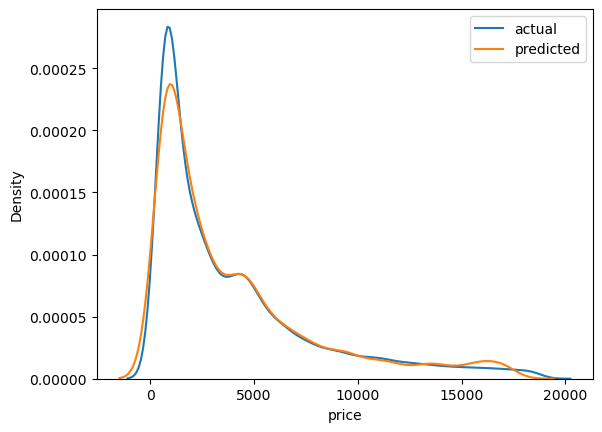

In [52]:
g= sns.distplot(train_copy["price"],hist=False,label='actual')
sns.distplot(y_pred,hist=False,ax=g,label='predicted')

plt.legend()
plt.show()

In [53]:
test_only = pd.read_csv('test.csv')

In [55]:
sub = {
    "id" : test_only["Id"],
    "price":final_prediction

}

pd.DataFrame(sub).to_csv("submissions",index=False)